# El objetivo de este ejercicio es identificar los costos de un seguro basados en informacion relevante del solicitante

Para este caso utilizaremos las tecnias de preprocesamiento de datos (Los 6 Pasos fundamentales) y varios métodos de regresion lineal (Simple, multiple, polinomial)

In [166]:
# Importamos las librerías necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<img src = 'Imagenes/salud.png'>

### Hacemos la carga y verificamos que haya sido correcta y que no existan duplicados

In [167]:
# cargamos el dataset

df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [168]:
# contamos los nulls por columna

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### ¡¡Excelente!! no tenemos nulos para este ejercicio, procedemos a crear las variables dummy

<img src = 'Imagenes/chill.jpg'>

Esta creación de variables dummy se ejecuta para las columnas categoricas, (Sex, Smoker, Region)

In [169]:
df['sex'] = (df['sex'] == 'male').astype(int)

In [170]:
df['smoker'] = (df['smoker'] == 'yes').astype(int)

In [171]:
dum = pd.get_dummies(df['region'])
dum = dum.drop(['southwest'], axis = 1)

In [172]:
df = df.drop(['region'], axis = 1)
df = df.join(dum)

In [173]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast
0,19,0,27.900,0,1,16884.92400,0,0,0
1,18,1,33.770,1,0,1725.55230,0,0,1
2,28,1,33.000,3,0,4449.46200,0,0,1
3,33,1,22.705,0,0,21984.47061,0,1,0
4,32,1,28.880,0,0,3866.85520,0,1,0


## Vamos a realizar los estadisticos básicos

<img src = 'Imagenes/charts.png'>

In [174]:
df.describe()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


En la descripción del dataframe podemos observar :
* en promedio la gente del estudio se encuentra saludable ya que su BMI es de 30.6
* Para el estudio solo se tomaron personas mayores de 18 años y menores de 64
* En promedio el inviduo tiene 1 hijo/hija

In [175]:
# Analizamos la correlacion entre las variables:

df.corr()['charges'].sort_values()

northwest   -0.039905
northeast    0.006349
sex          0.057292
children     0.067998
southeast    0.073982
bmi          0.198341
age          0.299008
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

### Las la relacion entre el costo y las personas que fuman es bastante alta

<img src = 'Imagenes/smoker.jpg'>

El secreto del análisis estadístico es realizar las preguntas correctas

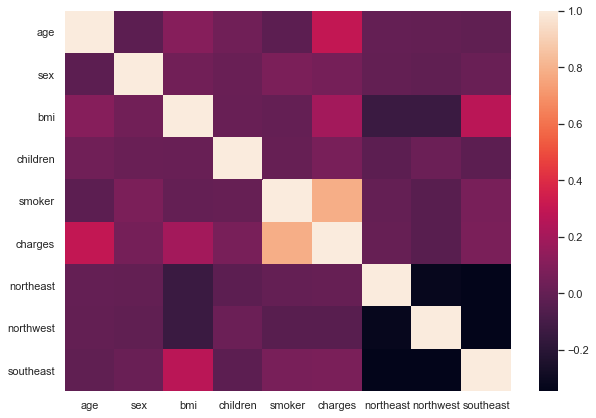

In [176]:
sns.set(rc = {'figure.figsize': (10,7)})
corr_fig = df.corr()
hm = sns.heatmap(corr_fig)

**La matriz de correlación nos ayuda a confirmar la sospecha**

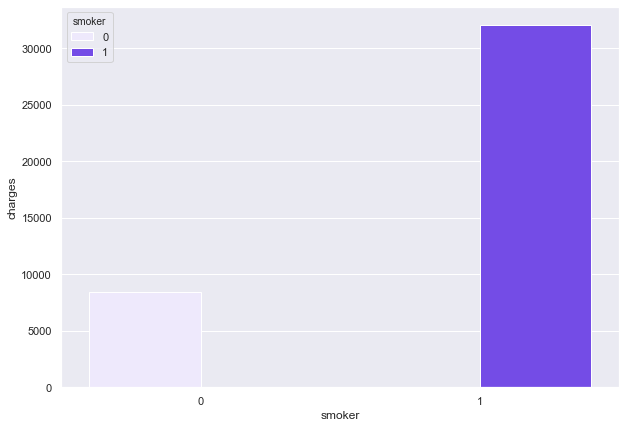

In [177]:
#¿La gente que fuma paga más seguro?

ax = sns.barplot(x = df['smoker'], y = df['charges'], hue = df['smoker'] , ci = None, color = '#6833FF')

*Podemos concluir que efectivamente la gente que fuma paga mas seguro medico*

Text(0.5, 1.0, 'Distribuciond de no fumadores por edad')

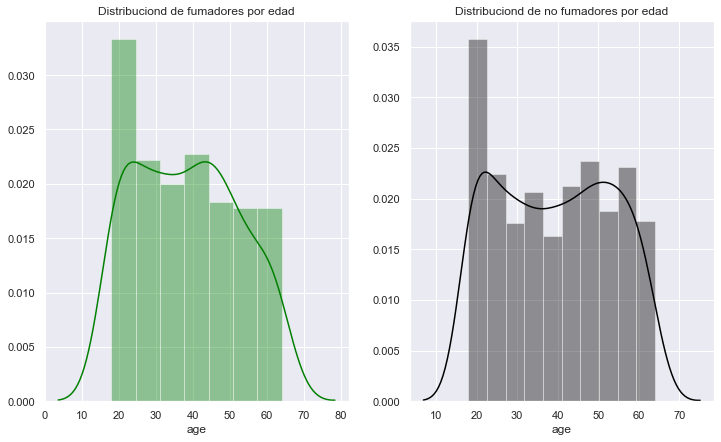

In [178]:
#¿Cual es la distribucion en edades de la gente que fuma?

fig, axis = plt.subplots(1,2, figsize = (12,7))

sns.distplot(df[(df.smoker == 1)]['age'], color = 'green', ax = axis[0]).set_title('Distribuciond de fumadores por edad')
sns.distplot(df[(df.smoker == 0)]['age'], color = 'black', ax = axis[1]).set_title('Distribuciond de no fumadores por edad')

*Como podemos observar en los graficos, la distribucion nos muestra que hay una gran cantidad de fumadores entre los 18 y los 20 años de edad*

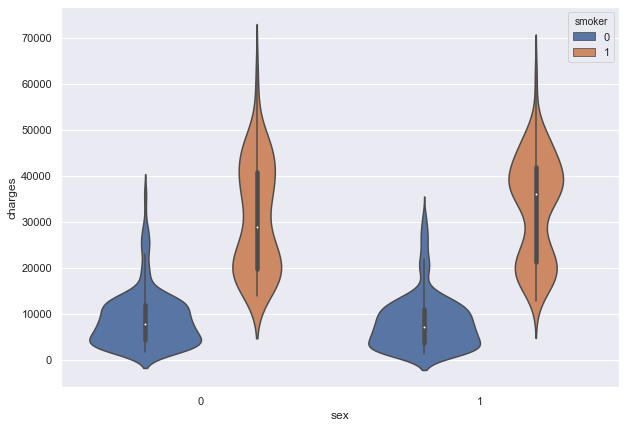

In [179]:
sns.violinplot(x="sex", y="charges", hue="smoker", data=df)

## Ahora vamos a anlizar la distribucion de pagos por edades

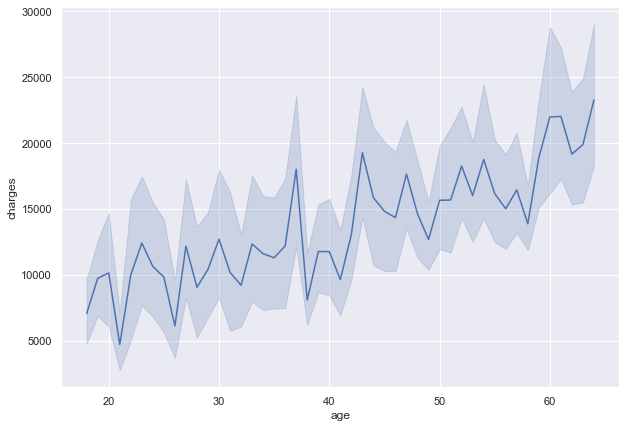

In [180]:
ax = sns.lineplot(x = 'age', y = 'charges', data = df)

*Encontramos una importante correlación entre la edad y el cargo del seguro*

***a mayor edad mayor costo del seguro ***

## Vamos a estudiar la relación entre la edad, bmi y los fumadores

1. vamos a ver como se distribuyen los indices de masa corporal

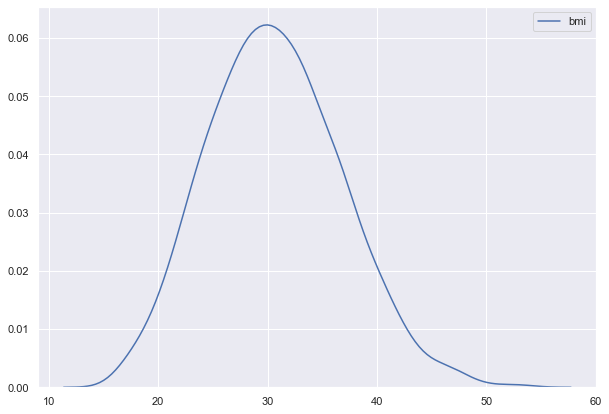

In [181]:
# Utilizando un gráfico de densidad

ax = sns.kdeplot(df['bmi'])

*Se distribuye como una normal con media sobre los 30*

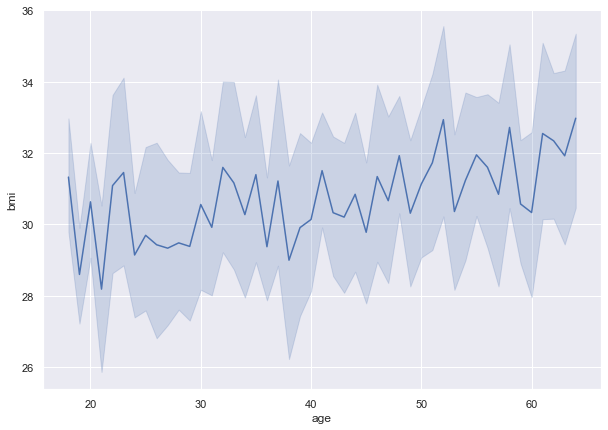

In [182]:
# Queremos saber como se relaciona el BMI y la edad de cada individuo

ax = sns.lineplot(x = 'age' , y = 'bmi' , data = df)

Al parecer se sigue distribuyendo igual, solo que con un poco de tendencia, a mayor edad

# una vez entendimos un poco los datos, procedemos a realizar algunas predicciones

In [183]:
# Preparamos las variables x y y

y = df['charges'].values
X = df.drop(['charges'], axis =1).values



In [184]:
# Importamos las librerías necesarias

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [185]:
# Separamos el conjunto de datos en test y train

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [186]:
# Creamos el objeto de la clase

regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [187]:
# Medimos el coeficiente R cuadrado

print('El R cuadrado para este ejercicio es de: ' + str(regression.score(X_test, y_test)*100) + '%')

El R cuadrado para este ejercicio es de: 79.99876970680434%


## Hacemos gráficos para comparar la prediccion

In [188]:
# hacemos la prediccion con el test

y_pred = regression.predict(X_train)

y_pred_test =  regression.predict(X_test)

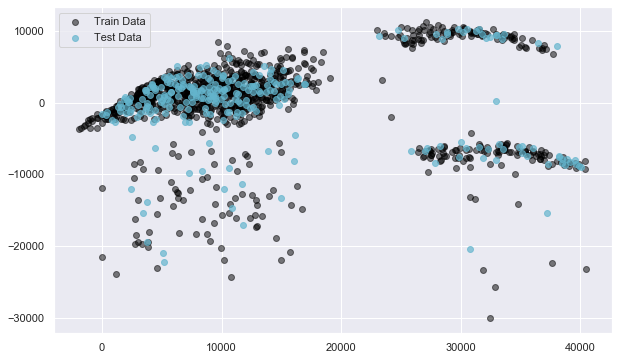

In [189]:
plt.figure(figsize =(10,6))

plt.scatter(y_pred, y_pred-y_train,c='black', marker = 'o', alpha =0.5, label = 'Train Data')
plt.scatter(y_pred_test, y_pred_test-y_test,c='c', marker = 'o', alpha =0.7, label = 'Test Data')

plt.legend(loc = 'upper left')

Podemos observar que le modelo se comporta bien pero creo que podemos mejorar un poco la predicción

## Modelo de regresión lineal polinómica de grado 2:

In [190]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures (degree = 2)

#---- hacemos el entrenamiento y ejecución de la data
x_poly = poly_reg.fit_transform(X_train)
x_poly_test = poly_reg.fit_transform(X_test)
poly_line_reg = LinearRegression()
poly_line_reg.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
poly_line_reg.score(x_poly, y_train)

0.8157610498396342

**Ahora nuestro R cuadrado es de 81%, es más cercano a 1**

In [192]:
# Ahora hacemos las predicciones de X_test y x_train
poly_pred_test = poly_line_reg.predict(x_poly_test)
poly_pred_train = poly_line_reg.predict(x_poly)

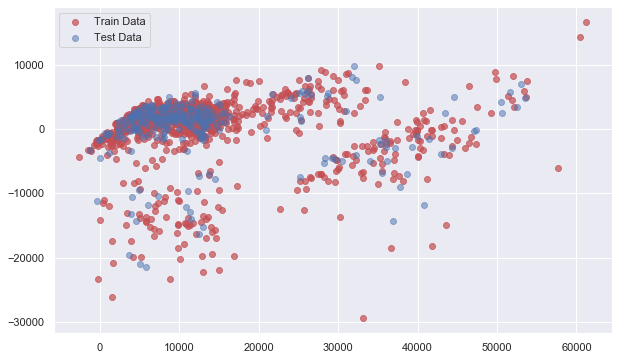

In [195]:
plt.figure(figsize =(10,6))


plt.scatter(poly_pred_train, poly_pred_train - y_train, c = 'r', alpha = 0.7, label = 'Train Data')
plt.scatter(poly_pred_test, poly_pred_test - y_test, c = 'b', alpha = 0.5, label = 'Test Data')

plt.legend(loc = 'upper left')

In [194]:
# Por ultimo observamos los coeficientes del modelo

poly_line_reg.coef_

array([ 2.39368953e+14,  3.56051789e+02, -6.88466385e+02, -9.18061650e+02,
       -1.07457396e+03, -9.64250769e+03,  2.23000512e+02, -1.22267115e+03,
        6.39042136e+02, -6.30937495e-01,  2.00362115e+01, -9.38455588e-02,
        1.11933883e+01, -1.62673219e+01, -1.01587962e+02, -7.40182525e+01,
       -1.68066387e+01, -6.88466385e+02,  7.04531644e+01, -1.73906037e+03,
       -1.60419404e+02, -1.04360723e+03,  3.41275806e+02,  3.04715013e+02,
        1.05810891e+01,  7.86122606e+01,  1.46939675e+03,  2.13202592e+02,
        2.47500461e+02,  4.58419789e+01,  3.71298843e+01,  4.86874438e+02,
       -6.67336511e+02, -8.99361455e+02, -1.37206746e+03, -9.64250769e+03,
       -1.58407828e+03, -2.12280631e+03, -2.46255851e+03,  2.23000512e+02,
        0.00000000e+00,  0.00000000e+00, -1.22267115e+03,  0.00000000e+00,
        6.39042136e+02])

**Conclusión:** Podemos concluir del modelo que es bastante ajustado con un 81 de R cuadrado, sin embargo podemos ver en el modelo que hay valores que afectan negativamente la prediccón, basados en la tabla de correlaciones, podríamos mejorar el modelo eliminando variables como la region.

<img src = 'Imagenes/tk.png'>